In [1]:
import time

st = time.time()

## Importing necessary libraries

In [2]:
from img2table.document import Image
from img2table.ocr import PaddleOCR
from PIL import Image as PIL_Image, ImageDraw
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
#######################################################################
# Code just for displaying images in full size, remove for final code #
#######################################################################

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [4]:
# Dictionary for storing marks of each papers
my_dict = {'1a': [], '1b': [], '1c': [], '2a': [], '2b': [], '2c': [], '3a': [], '3b': [], '3c': [], '4a': [], '4b': [], '4c': [], '5a': [], '5b': [], '5c': [], '6a': [], '6b': [], '6c': [], '7a': [], '7b': [], '7c': [], '8a': [], '8b': [], '8c': [], '9a': [], '9b': [], '9c': [], '10a': [], '10b': [], '10c': [], '11a': [], '11b': [], '11c': [], '12a': [], '12b': [], '12c': []}

## Image opening & performing OCR

In [5]:
paddle_ocr = PaddleOCR(lang="en")
src = "D:/AJAYMON/AJAY/Programming/Auto_Excel_Mark_Entry/Codes/image to table/ab_cut.jpg"

In [6]:
doc = Image(src, dpi=200)
extracted_tables = doc.extract_tables(ocr=paddle_ocr, implicit_rows=True, min_confidence=50)

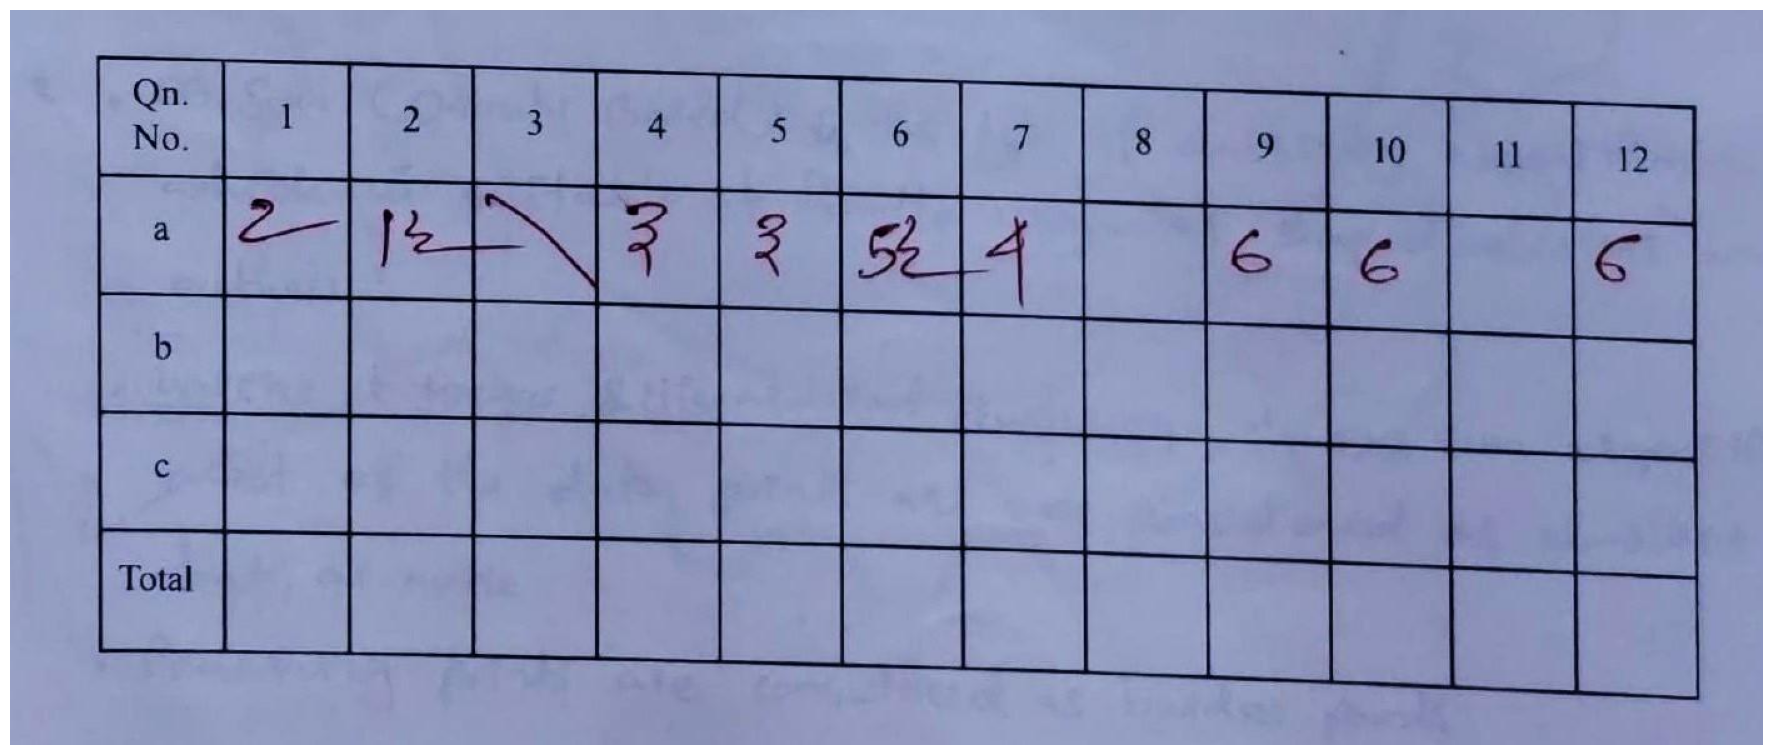

In [7]:
# Load the image using PIL
img = PIL_Image.open(src)

# Create a draw object
draw = ImageDraw.Draw(img)

img.save("temp/ori_img.jpg")
display("temp/ori_img.jpg")

## Getting red-lines on border lines of the image

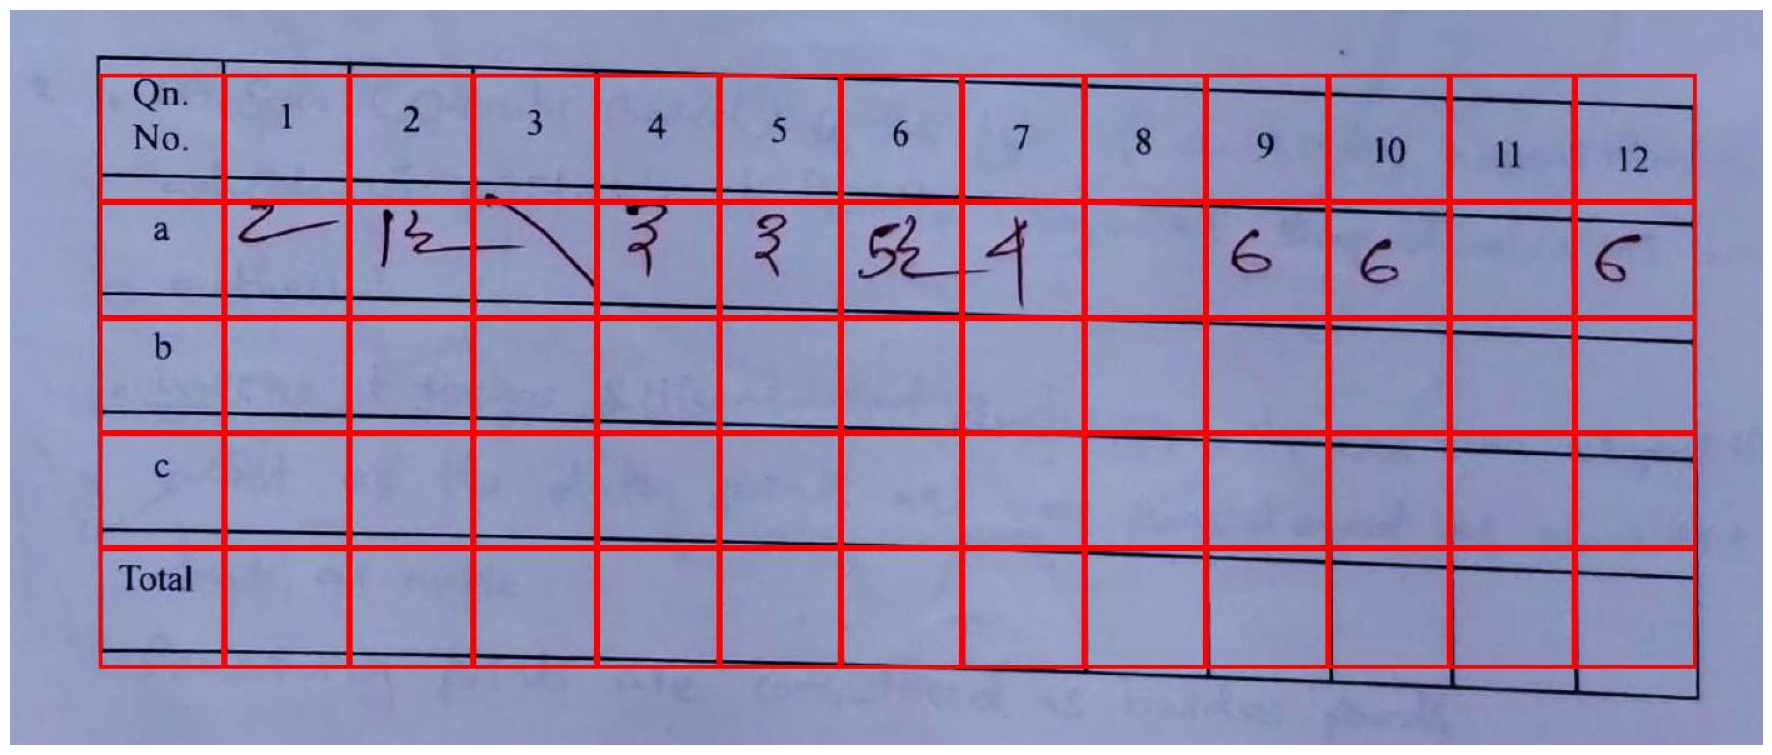

In [8]:
for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            draw.rectangle((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2), outline="red", width=3)
            
img.save("temp/img_with_redlines.jpg")
display("temp/img_with_redlines.jpg")

## Extracting info & Preprocessing the dataframe

In [9]:
df = table.df
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Qn.\nNo.,1,2,3,4,5,6,7,8,9,10,11,12
1,a,2,12,None,3,None,None,None,None,6,6,None,6
2,b,None,None,None,None,None,None,None,None,None,None,None,None
3,C,None,None,None,None,None,None,None,None,None,None,None,None
4,Total,None,None,None,None,None,None,None,None,None,None,None,None


In [10]:
df = df.iloc[1:, 1:] # deleting first row and column
df = df.drop(index=df.index[-1]) # remove the last row
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,2,12,None,3,None,None,None,None,6,6,None,6
2,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None


## Flattening & adding marks to my_dict

In [11]:
arr = df.to_numpy()
flat = arr.flatten(order='F') # flattening column-wise
cell_vals = [i for i in flat]
cell_vals

['2',
 None,
 None,
 '12',
 None,
 None,
 None,
 None,
 None,
 '3',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6',
 None,
 None,
 '6',
 None,
 None,
 None,
 None,
 None,
 '6',
 None,
 None]

In [12]:
len(cell_vals) # 36 should be the result

36

In [13]:
# Adding values to dictionary
i = 0
for key in my_dict:
    my_dict[key].append(cell_vals[i])
    i+=1

my_dict

{'1a': ['2'],
 '1b': [None],
 '1c': [None],
 '2a': ['12'],
 '2b': [None],
 '2c': [None],
 '3a': [None],
 '3b': [None],
 '3c': [None],
 '4a': ['3'],
 '4b': [None],
 '4c': [None],
 '5a': [None],
 '5b': [None],
 '5c': [None],
 '6a': [None],
 '6b': [None],
 '6c': [None],
 '7a': [None],
 '7b': [None],
 '7c': [None],
 '8a': [None],
 '8b': [None],
 '8c': [None],
 '9a': ['6'],
 '9b': [None],
 '9c': [None],
 '10a': ['6'],
 '10b': [None],
 '10c': [None],
 '11a': [None],
 '11b': [None],
 '11c': [None],
 '12a': ['6'],
 '12b': [None],
 '12c': [None]}

## Dictionary to dataframe & it's preprocessing

In [20]:
# dictionary pre-processes
dict_df = pd.DataFrame(my_dict)
dict_df # original df of dictionary

,1a,1b,1c,2a,2b,2c,3a,3b,3c,4a,...,9c,10a,10b,10c,11a,11b,11c,12a,12b,12c
0,2,None,None,12,None,None,None,None,None,3,...,None,6,None,None,None,None,None,6,None,None


### The df output may have 'None' values but they're actually NaN, so they won't come in exported CSV file

In [22]:
# dict_df = dict_df.replace(to_replace="None", value=np.nan) # Replacing all "None" to NaN, which will be empty when converted to CSV
dict_df = dict_df.dropna(axis=1, how='all')

dict_df

,1a,2a,4a,9a,10a,12a
0,2,12,3,6,6,6


In [16]:
# saving dict as csv
dict_df.to_csv("dict_csv.csv", index=False)

In [17]:
print("Total time (in seconds): ", time.time() - st)

Total time (in seconds):  22.9024498462677
